<a href="https://colab.research.google.com/github/eshanrat/LePRD/blob/master/LEPrD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  # mount our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import glob

In [ ]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe

import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import threshold_local
import imutils
from imutils import contours
import xml.etree.ElementTree as ET
import gspread
import pandas as pd
from google.colab import auth
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vPMMHoKU2u0ILwot9src6kIZAj8jgwIbFbn0N36AKk4/edit#gid=0')

ws = sheet.worksheet('Sheet1')
plateDetails = get_as_dataframe(ws)
plateDetails.drop(plateDetails.columns[plateDetails.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
indexCol = plateDetails['Index'].tolist()
indexCol = [indexCol for indexCol in indexCol if str(indexCol) != 'nan']
indexCol = [item + '.jpg' for item in indexCol]
print(indexCol)

plateLabels = plateDetails['Label'].tolist()
plateLabels = [plateLabels for plateLabels in plateLabels if str(plateLabels) != 'nan']
plateLabels = [str(i) for i in plateLabels]
print(plateLabels)
print(len(indexCol))
print(len(plateLabels))

labelDict = {k: v for v, k in enumerate(indexCol)}

['P6040001.jpg', 'P6040002.jpg', 'P6040003.jpg', 'P6040004.jpg', 'P6040005.jpg', 'P6040006.jpg', 'P6040007.jpg', 'P6040008.jpg', 'P6040009.jpg', 'P6040010.jpg', 'P6040011.jpg', 'P6040012.jpg', 'P6040013.jpg', 'P6040015.jpg', 'P6040016.jpg', 'P6040017.jpg', 'P6040019.jpg', 'P6040020.jpg', 'P6040021.jpg', 'P6040022.jpg', 'P6040023.jpg', 'P6040024.jpg', 'P6040025.jpg', 'P6040026.jpg', 'P6040027.jpg', 'P6040029.jpg', 'P6040030.jpg', 'P6040031.jpg', 'P6040032.jpg', 'P6040033.jpg', 'P6040034.jpg', 'P6040035.jpg', 'P6040036.jpg', 'P6040037.jpg', 'P6040038.jpg', 'P6040039.jpg', 'P6040040.jpg', 'P6040041.jpg', 'P6040042.jpg', 'P6040043.jpg', 'P6040044.jpg', 'P6040045.jpg', 'P6040046.jpg', 'P6040047.jpg', 'P6040048.jpg', 'P6040049.jpg', 'P6040050.jpg', 'P6040051.jpg', 'P6040052.jpg', 'P6040053.jpg', 'P6040054.jpg', 'P6040055.jpg', 'P6040057.jpg', 'P6040058.jpg', 'P6040059.jpg', 'P6040060.jpg', 'P6040061.jpg', 'P6040062.jpg', 'P6040063.jpg', 'P6040064.jpg', 'P6040065.jpg', 'P6040066.jpg', 'P60400

In [ ]:
np.random.seed(0)
randIndx = np.array(indexCol)
np.random.shuffle(randIndx)

N = randIndx.shape[0]
print(N)
trainingIndices = randIndx[:int(N*0.8)]
validIndices =  randIndx[int(N*0.8):int(N*0.9)]
testIndices =  randIndx[int(N*0.9):]
print(len(trainingIndices))
print(len(validIndices))
print(len(testIndices))

483
386
48
49


In [ ]:
trainingSet = []
trainingLabel = []
counter = 0
maskList = []
carImage = -1
path = '/content/drive/My Drive/Colab Notebooks/APS360/Project/dataset/'
listOfLabel = 0
for image_path in trainingIndices:
  counter += 1
  carImage+=1
  print("Iteration Count:   ")
  print(counter)
  maskList.clear()
  print(image_path)
  input_path = (path + image_path)
  image = cv2.imread(input_path)
  # plt.imshow(image)
  # plt.show()
  cv2.waitKey(0)
  imageName = image_path[:-4]
  # print(imageName)
  rowEntry = plateDetails.loc[plateDetails['Index'] == imageName]
  # print(rowEntry)
  ymax = int(rowEntry['Ymax'])
  ymin = int(rowEntry['Ymin'])
  xmax = int(rowEntry['Xmax'])
  xmin = int(rowEntry['Xmin'])
  # print(ymax, ymin, xmax, xmin)
  crop_img = image[ymin:ymax, xmin:xmax]
  # plt.imshow(crop_img)
  # plt.show()
  cv2.waitKey(0)
  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # gray2 = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
  # img_gray_mode = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # plt.imshow(image)
  # plt.show()
  # plt.imshow(image_rgb)
  # plt.show()
  # plt.imshow(gray)
  # plt.show()
  # plt.imshow(gray, cmap='gray')
  # plt.show()
  # for child in root.iter('xmin'):
  #   xmin = int(child.text)

  # for child in root.iter('xmax'):
  #   xmax = int(child.text)

  # for child in root.iter('ymin'):
  #   ymin = int(child.text)

  # for child in root.iter('ymax'):
  #   ymax = int(child.text)

  # print(xmin)
  # print(xmax)
  # print(ymin)
  # print(ymax)

  # crop_img = image[ymin:ymax, xmin:xmax]
  # plt.imshow(crop_img)
  # plt.show()
  # cv2.waitKey(0)

  # image = cv2.imread('/root/train/040603/P1010001.jpg')

  #image = cv2.imread('/root/train/040603/P6040015.jpg')
  #image = cv2.imread('/content/drive/My Drive/Colab Notebooks/APS360/Project/images/Cars1.png')
  # image = cv2.imread('/root/train/040603/P1010003.jpg')
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  gray2 = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
  img_gray_mode = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


  # plt.imshow(image)
  # plt.show()
  # plt.imshow(image_rgb)
  # plt.show()
  # plt.imshow(gray)
  # plt.show()
  # plt.imshow(gray, cmap='gray')
  # plt.show()
  # plt.imshow(gray2)
  # plt.show()
  # plt.imshow(img_gray_mode)
  # plt.show()
  #ksize was 3 before
  sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=1)
  sobely = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize=1)
  # plt.imshow(sobelx+sobely,cmap = 'gray')

  edged = cv2.Canny(gray, 170, 200)
  # plt.imshow(edged,cmap = 'gray')

  gray_noise = cv2.bilateralFilter(gray, 11, 17, 17)
  edged2 = cv2.Canny(gray_noise, 170, 200)
  # plt.imshow(edged2,cmap = 'gray')

  # mask = np.zeros(gray.shape,np.uint8) #Array filled with zeros, basically black box
  # image_masked = cv2.drawContours(mask,[screenCnt],0,255,-1,) #Draw found contour on mask and fill it white
  # image_masked = cv2.bitwise_and(image,image,mask=mask) #Bitwise and, to keep everything within contour

  # plt.imshow(image_masked)

  # # Now crop
  # (x, y) = np.where(mask == 255)
  # (topx, topy) = (np.min(x), np.min(y))
  # (bottomx, bottomy) = (np.max(x), np.max(y))
  # cropped_img = image[topx:bottomx+1, topy:bottomy+1]

  # plt.imshow(cropped_img)

  # # Now crop
  # (x, y) = np.where(mask == 255)
  # (topx, topy) = (np.min(x), np.min(y))
  # (bottomx, bottomy) = (np.max(x), np.max(y))
  # cropped = gray[topx:bottomx+1, topy:bottomy+1]

  # plt.imshow(cropped, cmap='gray')
  # extract the Value component from the HSV color space and apply adaptive thresholding
  # to reveal the characters on the license plate
  V = cv2.split(cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV))[2]
  # T = threshold_local(V, 29, offset=15, method="gaussian") #################ORIGINAL 29, CHANGED TO 99
  T = threshold_local(V, 99, offset=15, method="gaussian")
  thresh = (V > T).astype("uint8") * 255
  thresh = cv2.bitwise_not(thresh)

  # plt.imshow(thresh, cmap='gray')
  # plt.show()

  from skimage import measure
  import random
  good_contours = []
  labels = measure.label(thresh, neighbors=8, background=0)
  charCandidates = np.zeros(thresh.shape, dtype="uint8")
  ##print(len(np.unique(labels)))

  # loop over the unique components
  for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
      continue

    # otherwise, construct the label mask to display only connected components for the
    # current label, then find contours in the label mask
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    cnts = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    # (cnts, _) = contours.sort_contours(cnts, method="top-to-bottom") ####ADDED#####################
    # (cnts, _) = contours.sort_contours(cnts, method="left-to-right") ####ADDED#####################
    # cnts = cnts[0] if imutils.is_cv2() else cnts[1]

    # cnts.sort(key=lambda x:get_contour_precedence(x, thresh.shape[1]))


    good_contours.append((cnts,labelMask))
    random.shuffle(good_contours)
    
    ############# PLOT #######################
  # good_contours.sort(key=lambda x:get_contour_precedence(x[0], thresh.shape[1]))

  good_contours.sort(key=lambda x:cv2.boundingRect(max(x[0], key=cv2.contourArea))[0])


  
  asciiLabels = []
  labelMaskList = []
  for cnts, labelMask in good_contours:
    # ensure at least one contour was found in the mask
    if len(cnts) > 0:
      # grab the largest contour which corresponds to the component in the mask, then
      # grab the bounding box for the contour

      # c = min(cnts, key=cv2.contourArea)
      c = max(cnts, key=cv2.contourArea)
      (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)
      # print('Counter: ', counter)

      # print("Divide", boxW/float(boxH))
      # print("KeepAspect", (boxW/float(boxH)) < 1.0)
      # print("Divide", cv2.contourArea(c)/float(boxW * boxH))
      # print("Keep Solidity", (cv2.contourArea(c)/float(boxW * boxH)) > 0.15)
      # print("Divide", boxH / float(thresh.shape[0]))
      # print("Keep Height", (boxH / float(thresh.shape[0]) > 0.4) and (boxH / float(thresh.shape[0])<0.95))

      # print("\n")
      
      

      # compute the aspect ratio, solidity, and height ratio for the component
      aspectRatio = boxW / float(boxH)
      solidity = cv2.contourArea(c) / float(boxW * boxH)
      heightRatio = boxH / float(thresh.shape[0])

      # determine if the aspect ratio, solidity, and height of the contour pass
      # the rules tests
      keepAspectRatio = aspectRatio < 1.0
      keepSolidity = solidity > 0.15
      keepHeight = heightRatio > 0.55 and heightRatio < 0.95
      # keepHeight = heightRatio > 0.4 and heightRatio < 0.95  ###ORIGINAL###

      # check to see if the component passes all the tests
      if keepAspectRatio and keepSolidity and keepHeight:
        # compute the convex hull of the contour and draw it on the character
        # candidates mask
        try:
          hull = cv2.convexHull(c)
          cv2.drawContours(charCandidates, [hull], -1, 255, -1) 
        except Exception:
          print("Issue with drawcontours. This is the image:        ")
          print(image_path)
          badImages.append(image_path)
          continue
        else:
          labelMask = labelMask[boxY:boxY+boxH, boxX:boxX+boxW]
          labelMask = cv2.copyMakeBorder(labelMask,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
          labelMask = cv2.resize(labelMask, (30,60))
          # plt.imshow(labelMask, cmap='gray')
          # plt.show()
          labelMaskList.append(labelMask)
          labelIndexVal = labelDict[image_path]
          labelString = plateLabels[labelIndexVal]
          if (not asciiLabels):
            for i in labelString:
              x = ord(i)
              if(x >= ord('0') and x <= ord('9')):
                temp = x-ord('0')
                asciiLabels.append(temp)
                # print(type(x-ord('0')))
                # print(x-ord('0'))
              else:
                temp = x-ord('A')+10
                asciiLabels.append(temp)
                # print(type(x-ord('A')+10))
                # print(x-ord('A')+10)
            trainingLabel.append(asciiLabels) 
  if (labelMaskList):
    trainingSet.append(labelMaskList)

        ############### FILTERED PLOT, BUT NOT WORKING ##########################
        # plt.imshow(labelMask, cmap='gray')
        # plt.show()  
  # print(keepAspectRatio)
  # print(keepSolidity)
  # print(keepHeight)



Iteration Count:   
1
P6040017.jpg
Iteration Count:   
2
P6070057.jpg
Iteration Count:   
3
P6070074.jpg
Iteration Count:   
4
P5280049.jpg
Iteration Count:   
5
P1010006.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:138: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


Iteration Count:   
6
P6070075.jpg
Iteration Count:   
7
P9170012.jpg
Iteration Count:   
8
P9180007.jpg
Iteration Count:   
9
P6070046.jpg
Iteration Count:   
10
P6040024.jpg
Iteration Count:   
11
Pa140006.jpg
Iteration Count:   
12
P6070051.jpg
Iteration Count:   
13
P9180020.jpg
Iteration Count:   
14
P5280114.jpg
Iteration Count:   
15
P5280036.jpg
Iteration Count:   
16
P5280010.jpg
Iteration Count:   
17
P6070008.jpg
Iteration Count:   
18
P6070035.jpg
Iteration Count:   
19
P5280096.jpg
Iteration Count:   
20
Pa140017.jpg
Iteration Count:   
21
P9180052.jpg
Iteration Count:   
22
P6070033.jpg
Iteration Count:   
23
P5280031.jpg
Iteration Count:   
24
P6040041.jpg
Iteration Count:   
25
P9170018.jpg
Iteration Count:   
26
P5280105.jpg
Iteration Count:   
27
P5280002.jpg
Iteration Count:   
28
P9190065.jpg
Iteration Count:   
29
P9180013.jpg
Iteration Count:   
30
Pa140010.jpg
Iteration Count:   
31
P9180011.jpg
Iteration Count:   
32
P6040013.jpg
Iteration Count:   
33
P9170017.

In [ ]:
print(len(trainingLabel))
print(trainingLabel)
print(len(trainingSet))
#print(trainingSet)

385
[[35, 16, 8, 8, 4, 10, 22], [11, 14, 32, 7, 4, 2], [8, 1, 2, 29, 4, 7, 5], [20, 10, 5, 9, 6, 12, 19], [28, 18, 1, 6, 0, 11, 11], [35, 16, 4, 0, 9, 4, 0], [35, 16, 5, 9, 3, 35, 17], [28, 29, 7, 5, 0, 1, 0], [13, 30, 1, 9, 0, 12, 14], [25, 14, 5, 9, 15, 29], [9, 9, 5, 2, 25], [27, 18, 22, 12], [35, 16, 4, 9, 3, 2, 28], [35, 16, 3, 9, 4, 19, 30], [35, 16, 7, 9, 0, 13, 0], [25, 30, 6, 5, 8, 14, 18], [35, 16, 4, 8, 9, 8, 10, 12], [13, 10, 5, 4, 5, 10, 18], [2, 7, 0, 19, 11], [35, 16, 1, 6, 6, 5, 10, 14], [0, 6, 20, 15], [12, 10, 8, 9, 0, 11, 12], [35, 16, 4, 0, 1, 12, 12], [28, 18, 6, 6, 3, 11, 23], [27, 18, 2, 3, 8, 19, 21], [16, 35, 0, 4, 2, 1, 4], [0, 3, 6, 19, 0, 3, 7], [21, 19, 31, 5, 28], [35, 16, 8, 9, 4, 1, 23], [6, 6, 0, 30, 30], [35, 16, 4, 8, 4, 21, 13], [35, 16, 6, 5, 5, 30, 27], [13, 30, 9, 8, 6, 11, 22], [35, 16, 0, 8], [31, 35, 5, 3, 9, 10, 25], [35, 16, 7, 18], [35, 16, 9, 0, 0, 13, 0], [35, 16, 4, 9, 4, 0, 21], [35, 16, 2, 5, 6, 15, 35], [35, 16, 6, 3, 3, 16, 28], [11, 

In [ ]:
validationSet = []
validationLabel = []

maskList = []
carImage = -1
path = '/content/drive/My Drive/Colab Notebooks/APS360/Project/dataset/'
counter = 0
for image_path in validIndices:
  carImage+=1
  counter+=1
  print("Iteration Count:   ")
  print(counter)
  maskList.clear()
  print(image_path)
  input_path = os.path.join(path, image_path)
  image = cv2.imread(input_path)
  # plt.imshow(image)
  # plt.show()
  cv2.waitKey(0)
  imageName = image_path[:-4]
  # print(imageName)
  rowEntry = plateDetails.loc[plateDetails['Index'] == imageName]
  # print(rowEntry)
  ymax = int(rowEntry['Ymax'])
  ymin = int(rowEntry['Ymin'])
  xmax = int(rowEntry['Xmax'])
  xmin = int(rowEntry['Xmin'])
  # print(ymax, ymin, xmax, xmin)
  crop_img = image[ymin:ymax, xmin:xmax]
  # plt.imshow(crop_img)
  # plt.show()
  cv2.waitKey(0)
  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # gray2 = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
  # img_gray_mode = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # plt.imshow(image)
  # plt.show()
  # plt.imshow(image_rgb)
  # plt.show()
  # plt.imshow(gray)
  # plt.show()
  # plt.imshow(gray, cmap='gray')
  # plt.show()
  # for child in root.iter('xmin'):
  #   xmin = int(child.text)

  # for child in root.iter('xmax'):
  #   xmax = int(child.text)

  # for child in root.iter('ymin'):
  #   ymin = int(child.text)

  # for child in root.iter('ymax'):
  #   ymax = int(child.text)

  # print(xmin)
  # print(xmax)
  # print(ymin)
  # print(ymax)

  # crop_img = image[ymin:ymax, xmin:xmax]
  # plt.imshow(crop_img)
  # plt.show()
  # cv2.waitKey(0)

  # image = cv2.imread('/root/train/040603/P1010001.jpg')

  #image = cv2.imread('/root/train/040603/P6040015.jpg')
  #image = cv2.imread('/content/drive/My Drive/Colab Notebooks/APS360/Project/images/Cars1.png')
  # image = cv2.imread('/root/train/040603/P1010003.jpg')
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  gray2 = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
  img_gray_mode = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


  # plt.imshow(image)
  # plt.show()
  # plt.imshow(image_rgb)
  # plt.show()
  # plt.imshow(gray)
  # plt.show()
  # plt.imshow(gray, cmap='gray')
  # plt.show()
  # plt.imshow(gray2)
  # plt.show()
  # plt.imshow(img_gray_mode)
  # plt.show()
  #ksize was 3 before
  sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=1)
  sobely = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize=1)
  # plt.imshow(sobelx+sobely,cmap = 'gray')

  edged = cv2.Canny(gray, 170, 200)
  # plt.imshow(edged,cmap = 'gray')

  gray_noise = cv2.bilateralFilter(gray, 11, 17, 17)
  edged2 = cv2.Canny(gray_noise, 170, 200)
  # plt.imshow(edged2,cmap = 'gray')

  # mask = np.zeros(gray.shape,np.uint8) #Array filled with zeros, basically black box
  # image_masked = cv2.drawContours(mask,[screenCnt],0,255,-1,) #Draw found contour on mask and fill it white
  # image_masked = cv2.bitwise_and(image,image,mask=mask) #Bitwise and, to keep everything within contour

  # plt.imshow(image_masked)

  # # Now crop
  # (x, y) = np.where(mask == 255)
  # (topx, topy) = (np.min(x), np.min(y))
  # (bottomx, bottomy) = (np.max(x), np.max(y))
  # cropped_img = image[topx:bottomx+1, topy:bottomy+1]

  # plt.imshow(cropped_img)

  # # Now crop
  # (x, y) = np.where(mask == 255)
  # (topx, topy) = (np.min(x), np.min(y))
  # (bottomx, bottomy) = (np.max(x), np.max(y))
  # cropped = gray[topx:bottomx+1, topy:bottomy+1]

  # plt.imshow(cropped, cmap='gray')
  # extract the Value component from the HSV color space and apply adaptive thresholding
  # to reveal the characters on the license plate
  V = cv2.split(cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV))[2]
  # T = threshold_local(V, 29, offset=15, method="gaussian") #################ORIGINAL 29, CHANGED TO 99
  T = threshold_local(V, 99, offset=15, method="gaussian")
  thresh = (V > T).astype("uint8") * 255
  thresh = cv2.bitwise_not(thresh)

  # plt.imshow(thresh, cmap='gray')
  # plt.show()

  from skimage import measure
  import random
  good_contours = []
  labels = measure.label(thresh, neighbors=8, background=0)
  charCandidates = np.zeros(thresh.shape, dtype="uint8")
  ##print(len(np.unique(labels)))

  # loop over the unique components
  for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
      continue

    # otherwise, construct the label mask to display only connected components for the
    # current label, then find contours in the label mask
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    cnts = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    # (cnts, _) = contours.sort_contours(cnts, method="top-to-bottom") ####ADDED#####################
    # (cnts, _) = contours.sort_contours(cnts, method="left-to-right") ####ADDED#####################
    # cnts = cnts[0] if imutils.is_cv2() else cnts[1]

    # cnts.sort(key=lambda x:get_contour_precedence(x, thresh.shape[1]))


    good_contours.append((cnts,labelMask))
    random.shuffle(good_contours)
    
    ############# PLOT #######################
  # good_contours.sort(key=lambda x:get_contour_precedence(x[0], thresh.shape[1]))

  good_contours.sort(key=lambda x:cv2.boundingRect(max(x[0], key=cv2.contourArea))[0])


  asciiLabels = []
  labelMaskList = []
  for cnts, labelMask in good_contours:
    # ensure at least one contour was found in the mask
    if len(cnts) > 0:
      # grab the largest contour which corresponds to the component in the mask, then
      # grab the bounding box for the contour

      # c = min(cnts, key=cv2.contourArea)
      c = max(cnts, key=cv2.contourArea)
      (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)
      # print('Counter: ', Counter)

      # print("Divide", boxW/float(boxH))
      # print("KeepAspect", (boxW/float(boxH)) < 1.0)
      # print("Divide", cv2.contourArea(c)/float(boxW * boxH))
      # print("Keep Solidity", (cv2.contourArea(c)/float(boxW * boxH)) > 0.15)
      # print("Divide", boxH / float(thresh.shape[0]))
      # print("Keep Height", (boxH / float(thresh.shape[0]) > 0.4) and (boxH / float(thresh.shape[0])<0.95))

      # print("\n")
      
      

      # compute the aspect ratio, solidity, and height ratio for the component
      aspectRatio = boxW / float(boxH)
      solidity = cv2.contourArea(c) / float(boxW * boxH)
      heightRatio = boxH / float(thresh.shape[0])

      # determine if the aspect ratio, solidity, and height of the contour pass
      # the rules tests
      keepAspectRatio = aspectRatio < 1.0
      keepSolidity = solidity > 0.15
      keepHeight = heightRatio > 0.55 and heightRatio < 0.95
      # keepHeight = heightRatio > 0.4 and heightRatio < 0.95  ###ORIGINAL###

      # check to see if the component passes all the tests
      if keepAspectRatio and keepSolidity and keepHeight:
        # compute the convex hull of the contour and draw it on the character
        # candidates mask
        try:
          hull = cv2.convexHull(c)
          cv2.drawContours(charCandidates, [hull], -1, 255, -1) 
        except Exception:
          print("Issue with drawcontours. This is the image:        ")
          print(image_path)
          badImages.append(image_path)
          continue
        else:
          ###print("We good")
          labelMask = labelMask[boxY:boxY+boxH, boxX:boxX+boxW]
          labelMask = cv2.copyMakeBorder(labelMask,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
          labelMask = cv2.resize(labelMask, (30,60))
          # plt.imshow(labelMask, cmap='gray')
          # plt.show()
          labelMaskList.append(labelMask)
          labelIndexVal = labelDict[image_path]
          labelString = plateLabels[labelIndexVal]
          if (not asciiLabels):
            for i in labelString:
              x = ord(i)
              if(x >= ord('0') and x <= ord('9')):
                temp = x-ord('0')
                asciiLabels.append(temp)
                # print(type(x-ord('0')))
                # print(x-ord('0'))
              else:
                temp = x-ord('A')+10
                asciiLabels.append(temp)
                # print(type(x-ord('A')+10))
                # print(x-ord('A')+10)
            validationLabel.append(asciiLabels) 
  if (labelMaskList):
    validationSet.append(labelMaskList)
        ############### FILTERED PLOT, BUT NOT WORKING ##########################
        # plt.imshow(labelMask, cmap='gray')
        # plt.show()  
  # print(keepAspectRatio)
  # print(keepSolidity)
  # print(keepHeight)



Iteration Count:   
1
P5280121.jpg
Iteration Count:   
2
P1010016.jpg
Iteration Count:   
3
Pa140018.jpg
Iteration Count:   
4
P6070064.jpg
Iteration Count:   
5
P9180010.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:138: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


Iteration Count:   
6
P9190067.jpg
Iteration Count:   
7
P5280048.jpg
Iteration Count:   
8
P5280111.jpg
Iteration Count:   
9
P1010040.jpg
Iteration Count:   
10
P6070017.jpg
Iteration Count:   
11
P6070054.jpg
Iteration Count:   
12
P9180042.jpg
Iteration Count:   
13
P9170049.jpg
Iteration Count:   
14
P9180022.jpg
Iteration Count:   
15
P9180015.jpg
Iteration Count:   
16
P9170011.jpg
Iteration Count:   
17
P6070024.jpg
Iteration Count:   
18
P6070015.jpg
Iteration Count:   
19
P5280053.jpg
Iteration Count:   
20
P6070052.jpg
Iteration Count:   
21
Pa140020.jpg
Iteration Count:   
22
P5280077.jpg
Iteration Count:   
23
P6040062.jpg
Iteration Count:   
24
P5280107.jpg
Iteration Count:   
25
P5280043.jpg
Iteration Count:   
26
Pa140042.jpg
Iteration Count:   
27
P9180008.jpg
Iteration Count:   
28
P6040046.jpg
Iteration Count:   
29
P6070038.jpg
Iteration Count:   
30
P9170015.jpg
Iteration Count:   
31
P9180025.jpg
Iteration Count:   
32
P5280059.jpg
Iteration Count:   
33
P9180024.

In [ ]:
print(len(validationLabel))
print(validationLabel)
print(len(validationSet))

48
[[20, 27, 4, 0, 1, 10], [31, 35, 7, 8, 5, 14, 27], [35, 16, 3, 7, 1, 10, 20], [11, 20, 15, 1, 9, 6], [35, 16, 3, 3, 0, 5, 19], [33, 12, 8, 0, 3], [35, 16, 4, 9, 4, 9, 28], [35, 16, 9, 8, 8, 29, 30], [35, 16, 4, 2, 4, 27, 18], [13, 30, 6, 4, 1, 12, 12], [28, 29, 1, 0, 2, 14, 30], [35, 16, 2, 0, 4, 7, 22], [35, 13, 9, 8, 6, 12, 30], [11, 20, 8, 5, 5, 9], [35, 16, 9, 0, 2, 35, 16], [35, 16, 8, 5, 2, 4, 10, 15], [35, 16, 2, 4, 6, 2, 10, 14], [35, 16, 9, 5, 7, 6, 10, 10], [35, 16, 6, 7, 9, 31, 15], [35, 28, 3, 8, 5, 8, 4], [35, 16, 4, 9, 29], [3, 9, 3, 11, 13], [17, 16, 10, 28, 1, 8, 0, 2], [35, 16, 6, 2, 7, 14, 20], [35, 16, 1, 4, 5, 5, 10, 21], [31, 30, 7, 6, 7, 12], [35, 16, 9, 5, 9, 19, 19], [25, 30, 7, 4, 2, 17, 31], [28, 18, 5, 6, 9, 10, 13], [35, 16, 4, 4, 9, 7, 25], [35, 16, 9, 7, 7, 29, 29], [35, 16, 2, 4, 8, 14, 11], [35, 16, 9, 0, 3, 22, 13], [35, 16, 8, 0, 0, 0, 35], [35, 16, 3, 4, 8, 12, 27], [20, 35, 3, 8, 6, 21], [35, 16, 6, 2, 4, 20], [22, 22, 22, 7, 7, 8, 0], [12, 20, 3,

In [ ]:
testingSet = []
testingLabel = []

maskList = []
carImage = -1
path = '/content/drive/My Drive/Colab Notebooks/APS360/Project/dataset/'
counter = 0
for image_path in testIndices:
  carImage+=1
  print("Iteration Count:   ")
  counter+=1
  print(counter)
  maskList.clear()
  print(image_path)
  input_path = os.path.join(path, image_path)
  image = cv2.imread(input_path)
  # plt.imshow(image)
  # plt.show()
  cv2.waitKey(0)
  imageName = image_path[:-4]
  # print(imageName)
  rowEntry = plateDetails.loc[plateDetails['Index'] == imageName]
  # print(rowEntry)
  ymax = int(rowEntry['Ymax'])
  ymin = int(rowEntry['Ymin'])
  xmax = int(rowEntry['Xmax'])
  xmin = int(rowEntry['Xmin'])
  # print(ymax, ymin, xmax, xmin)
  crop_img = image[ymin:ymax, xmin:xmax]
  # plt.imshow(crop_img)
  # plt.show()
  cv2.waitKey(0)
  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # gray2 = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
  # img_gray_mode = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # plt.imshow(image)
  # plt.show()
  # plt.imshow(image_rgb)
  # plt.show()
  # plt.imshow(gray)
  # plt.show()
  # plt.imshow(gray, cmap='gray')
  # plt.show()
  # for child in root.iter('xmin'):
  #   xmin = int(child.text)

  # for child in root.iter('xmax'):
  #   xmax = int(child.text)

  # for child in root.iter('ymin'):
  #   ymin = int(child.text)

  # for child in root.iter('ymax'):
  #   ymax = int(child.text)

  # print(xmin)
  # print(xmax)
  # print(ymin)
  # print(ymax)

  # crop_img = image[ymin:ymax, xmin:xmax]
  # plt.imshow(crop_img)
  # plt.show()
  # cv2.waitKey(0)

  # image = cv2.imread('/root/train/040603/P1010001.jpg')

  #image = cv2.imread('/root/train/040603/P6040015.jpg')
  #image = cv2.imread('/content/drive/My Drive/Colab Notebooks/APS360/Project/images/Cars1.png')
  # image = cv2.imread('/root/train/040603/P1010003.jpg')
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  gray2 = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
  img_gray_mode = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


  # plt.imshow(image)
  # plt.show()
  # plt.imshow(image_rgb)
  # plt.show()
  # plt.imshow(gray)
  # plt.show()
  # plt.imshow(gray, cmap='gray')
  # plt.show()
  # plt.imshow(gray2)
  # plt.show()
  # plt.imshow(img_gray_mode)
  # plt.show()
  #ksize was 3 before
  sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=1)
  sobely = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize=1)
  # plt.imshow(sobelx+sobely,cmap = 'gray')

  edged = cv2.Canny(gray, 170, 200)
  # plt.imshow(edged,cmap = 'gray')

  gray_noise = cv2.bilateralFilter(gray, 11, 17, 17)
  edged2 = cv2.Canny(gray_noise, 170, 200)
  # plt.imshow(edged2,cmap = 'gray')

  # mask = np.zeros(gray.shape,np.uint8) #Array filled with zeros, basically black box
  # image_masked = cv2.drawContours(mask,[screenCnt],0,255,-1,) #Draw found contour on mask and fill it white
  # image_masked = cv2.bitwise_and(image,image,mask=mask) #Bitwise and, to keep everything within contour

  # plt.imshow(image_masked)

  # # Now crop
  # (x, y) = np.where(mask == 255)
  # (topx, topy) = (np.min(x), np.min(y))
  # (bottomx, bottomy) = (np.max(x), np.max(y))
  # cropped_img = image[topx:bottomx+1, topy:bottomy+1]

  # plt.imshow(cropped_img)

  # # Now crop
  # (x, y) = np.where(mask == 255)
  # (topx, topy) = (np.min(x), np.min(y))
  # (bottomx, bottomy) = (np.max(x), np.max(y))
  # cropped = gray[topx:bottomx+1, topy:bottomy+1]

  # plt.imshow(cropped, cmap='gray')
  # extract the Value component from the HSV color space and apply adaptive thresholding
  # to reveal the characters on the license plate
  V = cv2.split(cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV))[2]
  # T = threshold_local(V, 29, offset=15, method="gaussian") #################ORIGINAL 29, CHANGED TO 99
  T = threshold_local(V, 99, offset=15, method="gaussian")
  thresh = (V > T).astype("uint8") * 255
  thresh = cv2.bitwise_not(thresh)

  # plt.imshow(thresh, cmap='gray')
  # plt.show()

  from skimage import measure
  import random
  good_contours = []
  labels = measure.label(thresh, neighbors=8, background=0)
  charCandidates = np.zeros(thresh.shape, dtype="uint8")
  #print(len(np.unique(labels)))

  # loop over the unique components
  for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
      continue

    # otherwise, construct the label mask to display only connected components for the
    # current label, then find contours in the label mask
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    cnts = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    # (cnts, _) = contours.sort_contours(cnts, method="top-to-bottom") ####ADDED#####################
    # (cnts, _) = contours.sort_contours(cnts, method="left-to-right") ####ADDED#####################
    # cnts = cnts[0] if imutils.is_cv2() else cnts[1]

    # cnts.sort(key=lambda x:get_contour_precedence(x, thresh.shape[1]))


    good_contours.append((cnts,labelMask))
    random.shuffle(good_contours)
    
    ############# PLOT #######################
  # good_contours.sort(key=lambda x:get_contour_precedence(x[0], thresh.shape[1]))

  good_contours.sort(key=lambda x:cv2.boundingRect(max(x[0], key=cv2.contourArea))[0])

  asciiLabels = []
  labelMaskList = []
  for cnts, labelMask in good_contours:
    # ensure at least one contour was found in the mask
    if len(cnts) > 0:
      # grab the largest contour which corresponds to the component in the mask, then
      # grab the bounding box for the contour

      # c = min(cnts, key=cv2.contourArea)
      c = max(cnts, key=cv2.contourArea)
      (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)
      # print('Counter: ', counter)

      # print("Divide", boxW/float(boxH))
      # print("KeepAspect", (boxW/float(boxH)) < 1.0)
      # print("Divide", cv2.contourArea(c)/float(boxW * boxH))
      # print("Keep Solidity", (cv2.contourArea(c)/float(boxW * boxH)) > 0.15)
      # print("Divide", boxH / float(thresh.shape[0]))
      # print("Keep Height", (boxH / float(thresh.shape[0]) > 0.4) and (boxH / float(thresh.shape[0])<0.95))

      # print("\n")
      
      

      # compute the aspect ratio, solidity, and height ratio for the component
      aspectRatio = boxW / float(boxH)
      solidity = cv2.contourArea(c) / float(boxW * boxH)
      heightRatio = boxH / float(thresh.shape[0])

      # determine if the aspect ratio, solidity, and height of the contour pass
      # the rules tests
      keepAspectRatio = aspectRatio < 1.0
      keepSolidity = solidity > 0.15
      keepHeight = heightRatio > 0.55 and heightRatio < 0.95
      # keepHeight = heightRatio > 0.4 and heightRatio < 0.95  ###ORIGINAL###

      # check to see if the component passes all the tests
      if keepAspectRatio and keepSolidity and keepHeight:
        # compute the convex hull of the contour and draw it on the character
        # candidates mask
        try:
          hull = cv2.convexHull(c)
          cv2.drawContours(charCandidates, [hull], -1, 255, -1) 
        except Exception:
          print("Issue with drawcontours. This is the image:        ")
          print(image_path)
          badImages.append(image_path)
          continue
        else:
          ###print("We good")
          labelMask = labelMask[boxY:boxY+boxH, boxX:boxX+boxW]
          labelMask = cv2.copyMakeBorder(labelMask,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
          labelMask = cv2.resize(labelMask, (30,60))
          # plt.imshow(labelMask, cmap='gray')
          # plt.show()
          labelMaskList.append(labelMask)
          labelIndexVal = labelDict[image_path]
          labelString = plateLabels[labelIndexVal]
          if (not asciiLabels):
            for i in labelString:
              x = ord(i)
              if(x >= ord('0') and x <= ord('9')):
                temp = x-ord('0')
                asciiLabels.append(temp)
                # print(type(x-ord('0')))
                # print(x-ord('0'))
              else:
                temp = x-ord('A')+10
                asciiLabels.append(temp)
                # print(type(x-ord('A')+10))
                # print(x-ord('A')+10)
            testingLabel.append(asciiLabels) 
  if (labelMaskList):
    testingSet.append(labelMaskList)

        ############### FILTERED PLOT, BUT NOT WORKING ##########################
        # plt.imshow(labelMask, cmap='gray')
        # plt.show()  
  # print(keepAspectRatio)
  # print(keepSolidity)
  # print(keepHeight)



Iteration Count:   
1
P6040036.jpg
Iteration Count:   
2
P6070060.jpg
Iteration Count:   
3
P1010021.jpg
Iteration Count:   
4
P9180030.jpg
Iteration Count:   
5
P5280074.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:138: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


Iteration Count:   
6
P9170051.jpg
Iteration Count:   
7
P9170025.jpg
Iteration Count:   
8
P9180017.jpg
Iteration Count:   
9
P6070080.jpg
Iteration Count:   
10
P5280071.jpg
Iteration Count:   
11
P9180027.jpg
Iteration Count:   
12
P1010013.jpg
Iteration Count:   
13
P6070032.jpg
Iteration Count:   
14
P5280125.jpg
Iteration Count:   
15
P9180006.jpg
Iteration Count:   
16
P5280122.jpg
Iteration Count:   
17
P1010034.jpg
Iteration Count:   
18
P5280029.jpg
Iteration Count:   
19
P6070048.jpg
Iteration Count:   
20
P9170032.jpg
Iteration Count:   
21
P5280051.jpg
Iteration Count:   
22
P6070005.jpg
Iteration Count:   
23
P5280120.jpg
Iteration Count:   
24
P6040029.jpg
Iteration Count:   
25
P6070100.jpg
Iteration Count:   
26
P5280124.jpg
Iteration Count:   
27
P9180043.jpg
Iteration Count:   
28
P1010010.jpg
Iteration Count:   
29
P9180049.jpg
Iteration Count:   
30
P6040043.jpg
Iteration Count:   
31
P1010029.jpg
Iteration Count:   
32
P5280100.jpg
Iteration Count:   
33
P9170023.

In [ ]:
print(len(testingLabel))
print(testingLabel)
print(len(testingSet))

49
[[15, 10, 22, 1, 6, 5], [3, 2, 2, 7, 23], [20, 20, 17, 5, 1, 2, 2], [18, 22, 6, 6, 0, 25], [35, 16, 4, 7, 4, 13, 30], [2, 2, 28, 20, 13], [35, 16, 7, 7, 6, 1, 22], [35, 16, 0, 0, 6, 10, 16], [31, 30, 3, 6, 9, 10, 23], [35, 16, 5, 6, 8, 29, 22], [10, 10, 28, 17, 9, 3, 8], [7, 1, 5, 15, 11], [13, 30, 7, 1, 1, 12, 17], [2, 9, 15], [9, 7, 0, 7, 20], [11, 18, 27, 22, 1, 6, 0], [35, 16, 4, 0, 4, 0, 19], [35, 16, 1, 0, 6, 21, 30], [0, 16, 10], [35, 16, 4, 2, 4, 16, 17], [35, 16, 9, 9, 5, 23, 23], [28, 29, 1, 7, 4, 18, 12], [25, 30, 8, 13], [14, 13, 21, 5, 5, 1], [20, 29, 4, 5, 1, 10, 23], [35, 16, 5, 9, 4, 29, 28], [35, 16, 9, 6, 1, 14, 16], [35, 16, 0, 0, 1, 3, 19, 25], [11, 10, 0, 5, 6, 16, 13], [35, 16, 9, 9, 0, 23, 21], [35, 16, 6, 3, 4, 7, 17], [35, 16, 7, 8, 9, 25, 18], [28, 20, 5, 5, 3, 10, 21], [10, 18, 12, 22, 22, 1, 4, 7], [20, 10, 5, 5, 5, 35, 16], [25, 30, 6, 4, 6, 13, 18], [35, 16, 9, 1, 1, 12, 20], [35, 16, 23, 18, 31, 14, 10, 1], [35, 16, 8, 2, 9, 8, 15], [35, 16, 3, 1, 4, 3

In [ ]:
# ! pip install pytesseract

In [ ]:
# import pytesseract
# #Read the number plate
# text = pytesseract.image_to_string(cropped, config='--psm 11')
# print("Detected license plate Number is:",text)

In [ ]:
# trainingSet = np.array(trainingSet)
# validationSet = np.array(validationSet)
# testingSet = np.array(testingSet)

for i in range(len(trainingSet)):
  trainingSet[i] = np.array(trainingSet[i])

for i in range(len(validationSet)):
  validationSet[i] = np.array(validationSet[i])

for i in range(len(testingSet)):
  testingSet[i] = np.array(testingSet[i])

for i in range(len(trainingSet)):
  trainingSet[i] = trainingSet[i]/255

for i in range(len(validationSet)):
  validationSet[i] = validationSet[i]/255

for i in range(len(testingSet)):
  testingSet[i] = testingSet[i]/255

  
# trainingSet = trainingSet/255 #Normalize data
# validationSet = validationSet/255
# testingSet = testingSet/255

for i in range(len(trainingLabel)):
  trainingLabel[i] = np.array(trainingLabel[i])

for i in range(len(validationLabel)):
  validationLabel[i] = np.array(validationLabel[i])

for i in range(len(testingLabel)):
  trainingLabel[i] = np.array(trainingLabel[i])
# trainingLabel = np.array(trainingLabel)
# validationLabel = np.array(validationLabel)
# testingLabel = np.array(testingLabel)

In [ ]:
print(type(trainingSet[0][1]))

<class 'numpy.ndarray'>


In [ ]:
trainData = []
validData = []
testData = []

# for i in range(trainingLabel.shape[0]):
#   trainData.append([trainingSet[i],trainingLabel[i]])

# for i in range(validationLabel.shape[0]):
#   validData.append([validationSet[i],validationLabel[i]])

# for i in range(testingLabel.shape[0]):
#   testData.append([testingSet[i],testingLabel[i]])

count = 0
for i in range(len(trainingLabel)):
  for j in range(len(trainingSet[i])):
    try:
      trainData.append([trainingSet[i][j], trainingLabel[i][j]])
    except Exception:
      count+=1
      continue

print(count)

count = 0
for i in range(len(validationLabel)):
  for j in range(len(validationSet[i])):
    try:
      validData.append([validationSet[i][j], validationLabel[i][j]])
    except Exception:
      count+=1
      continue

print(count)

count = 0
for i in range(len(testingLabel)):
  for j in range(len(testingSet[i])):
    try:
      testData.append([testingSet[i][j], testingLabel[i][j]])
    except Exception:
      count+=1
      continue

print(count)

2
0
2


In [ ]:
print(type(validData[0][1]))

<class 'numpy.int64'>


In [ ]:
print(len(trainingSet))

385


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(30*60, 1000)
        self.fc2 = nn.Linear(1000,36)
        
    def forward(self, x):
        flattened = x.view(-1, 30*60)
        activation1 = self.fc1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.fc2(activation1)
        return activation2 #Softmax is applied here interally since we use CE as a criterion.

In [ ]:
#For loss function I used cross entropy/log loss and for optimizer
#I used SGD. Log loss is one of the best loss functions for classification problems.
#I chose SGD since it is one of the best optimizers.
def get_accuracy(model,data_loader):

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        #imgs = alexNet.features(imgs) #SLOW
        #############################################
        #To Enable GPU Usage
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = torch.tensor(labels)
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train(model,batch_size=20, num_epochs=1,learningRate = 0.005,data = None,validData = None):

  train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, 
                                           num_workers=1, shuffle=True)
  valid_loader = torch.utils.data.DataLoader(validData, batch_size=batch_size, 
                                           num_workers=1, shuffle=True)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=learningRate, momentum=0.9)
  
  iters, losses, train_acc, val_acc = [], [], [], []
  listOfEpochs = []
  validIters,validLoss = [],[]
  # training
  n = 0 # the number of iterations
  nValid = 0
  for epoch in range(num_epochs):
      
      listOfEpochs.append(epoch)
      train_acc.append(get_accuracy(model, train_loader))
      val_acc.append(get_accuracy(model,valid_loader))
      for imgs, labels in iter(valid_loader):
         if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = torch.tensor(labels)
            labels = labels.cuda()
            out = model(imgs) 
            loss = criterion(out, labels) # compute the total loss
            validIters.append(nValid)
            validLoss.append(loss)
            nValid += 1


      for imgs, labels in iter(train_loader):
          #imgs = features = alexNet.features(imgs) #SLOW
            #############################################
            #To Enable GPU Usage
          
          if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = torch.tensor(labels)
            labels = labels.cuda()
            #############################################
            
              
          out = model(imgs)             # forward pass
        
        
          loss = criterion(out, labels) # compute the total loss
          loss.backward()               # backward pass (compute parameter updates)
          optimizer.step()              # make the updates for each parameter
          optimizer.zero_grad()         # a clean up step for PyTorch

          # save the current training information
          iters.append(n)
          losses.append(float(loss)/batch_size)             # compute *average* loss
          #train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
          #val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
          n += 1

  print("Training accuracy = "+str(get_accuracy(model,train_loader)))
  print("Validation accuracy = "+str(get_accuracy(model,valid_loader)))


  plt.title("Training Loss")
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Validation Loss")
  plt.plot(validIters, validLoss, label="Valid")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.plot(listOfEpochs, train_acc, label="Train")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.plot(listOfEpochs, val_acc, label="Train")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.title('Training and Validation Accuracies')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Training accuracy = 0.9941429129246389
Validation accuracy = 0.9848484848484849


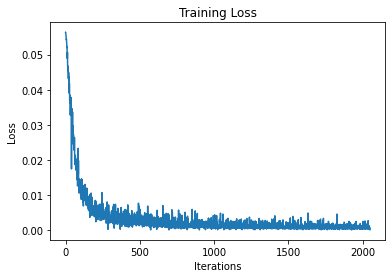

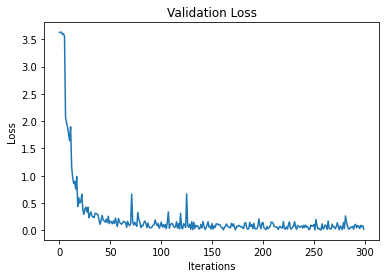

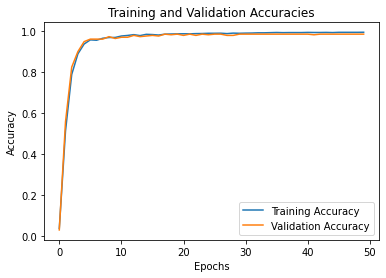

In [ ]:
myNet = ANN()
myNet = myNet.cuda()
train(myNet.double(),64,50,0.005,trainData,validData)

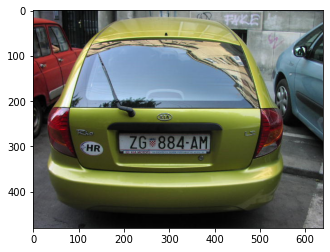

FAM165


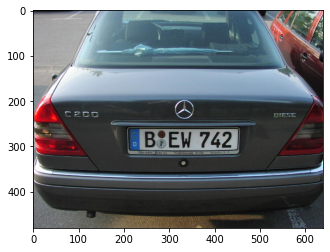

3227N


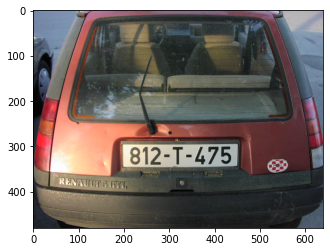

KKH5122


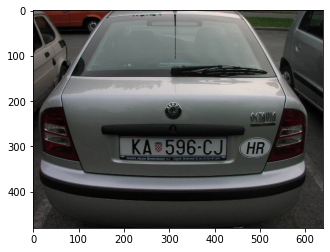

IM660P


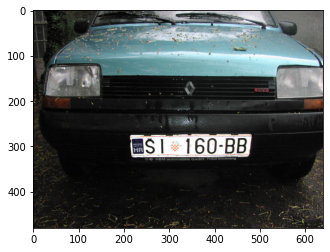

ZG474DU


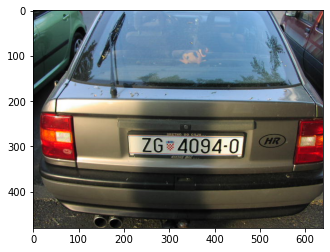

G922S


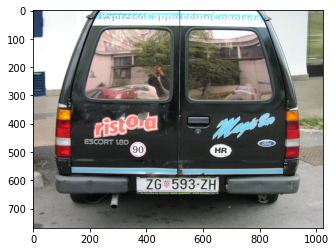

ZG7761M


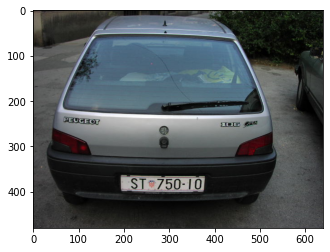

ZG006AG


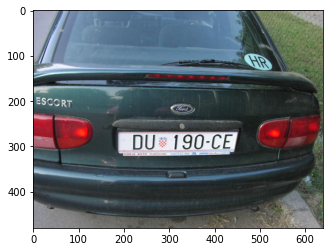

VU369AN


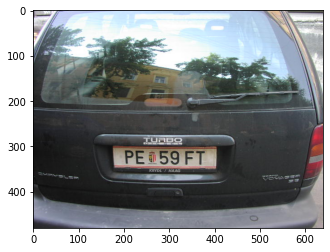

ZG568TM


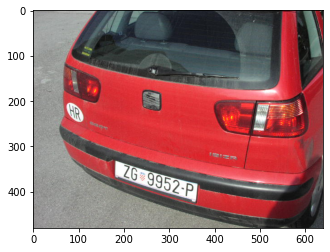

AASH938


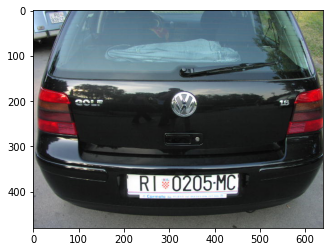

715FB


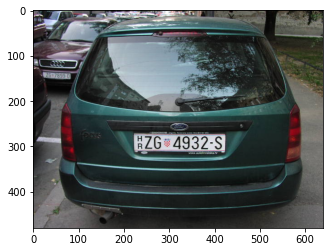

DU711CH


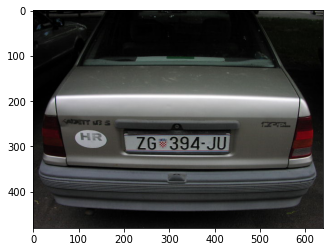

29F


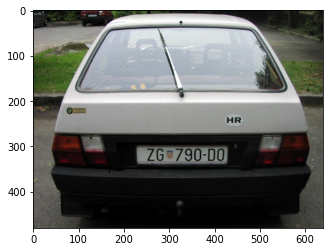

9707K


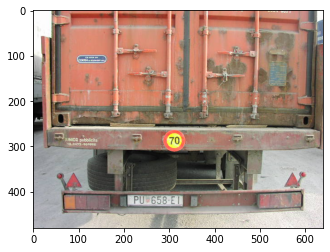

BIRM160


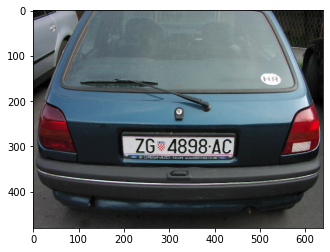

ZG4040J


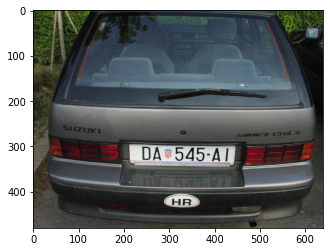

ZG106LU


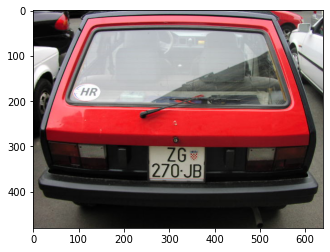

0GA


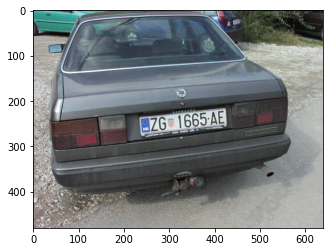

ZG424GH


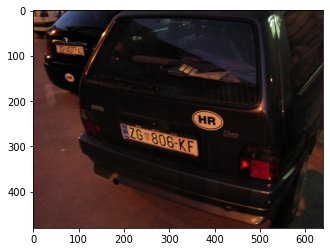

ZG995NN


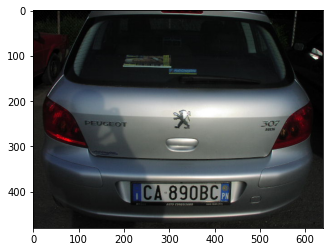

ST174IC


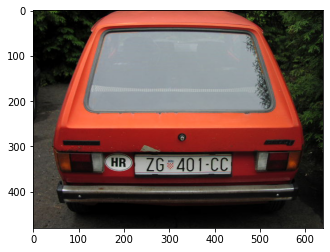

PU8D


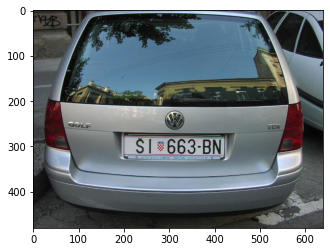

EDL551


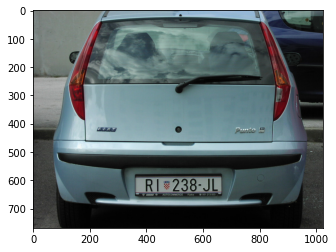

KT451AN


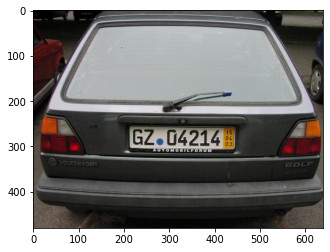

ZG594TS


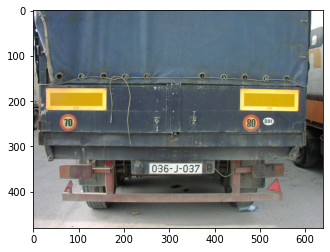

ZG961EG


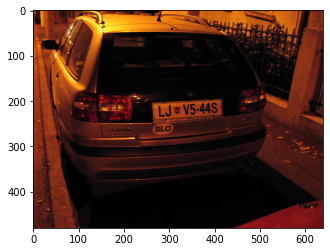

ZG0013JP


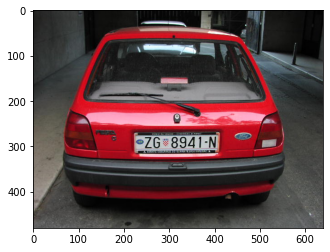

BA056CD


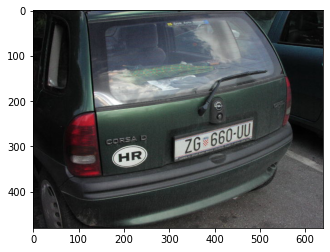

ZG990NL


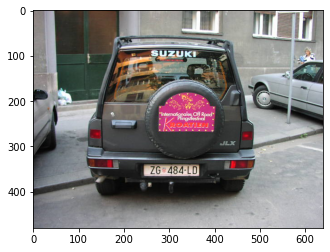

ZG6347H


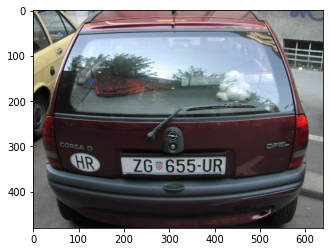

ZG789PI


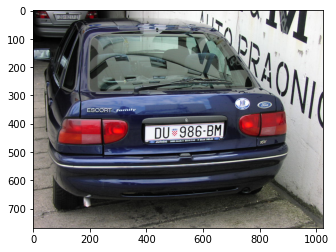

SK553AL


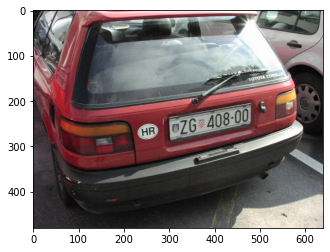

AICMM147


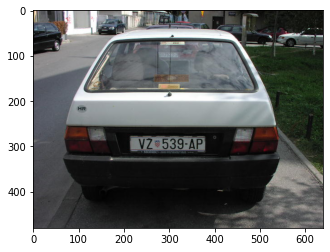

KA555ZG


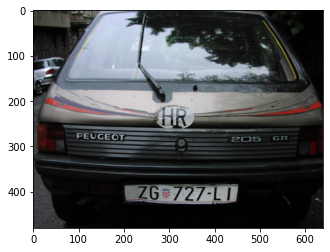

PU646DI


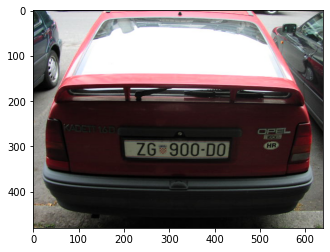

ZG9TJCK


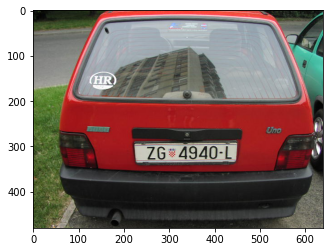

ZGNIVEA1


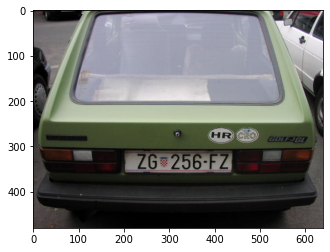

ZG8298F


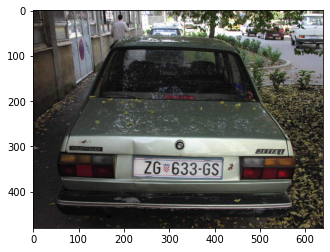

ZG314U


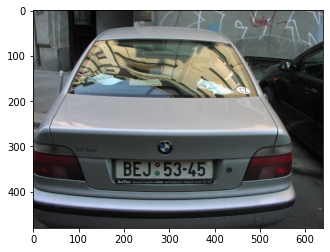

2877J


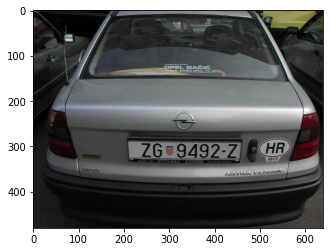

042K729


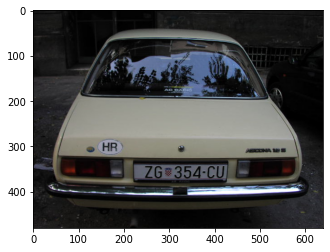

ZG8010AF


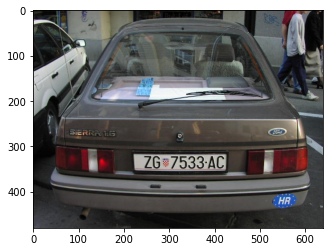

ZG8258H


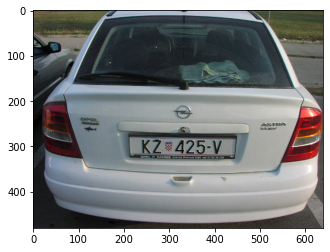

ZG163DB


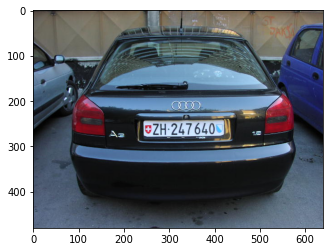

ZG7640AB


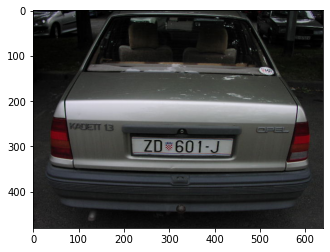

938CE


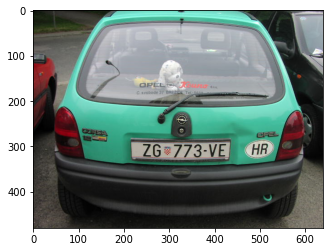

W21337S


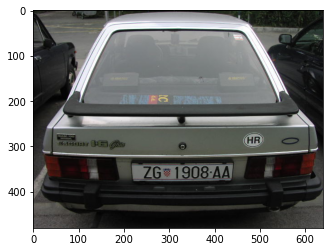

KK2313L


In [ ]:
test_loader = torch.utils.data.DataLoader(testData, batch_size=1, 
                                           num_workers=1, shuffle=False)

imgCounter = 0
correct = 0
testPlateLabels = []
s = ''
testSet = [0, 2, 3, 4, 6, 7, 8, 9, 15, 16, 19, 20, 21, 24, 26]
#Change character to strings of license plates
for imgs, labels in iter(test_loader):
        
           
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #out = bmyNet(imgs)
        out = myNet(imgs)
        pred = out.max(1, keepdim=True)[1]
        imgCounter = imgCounter + 1
        if (pred >= 0 and pred <= 9):
          predChar = chr(pred+ord('0'))
        else:
          predChar = chr(pred+ord('A')-10)
        s = s+predChar
        imgCounter = 0
        testPlateLabels.append(s)
        s = ''

targetLabels = []

for i in range(len(testIndices)):
  temp = testIndices[i]
  temp2 = labelDict[temp]
  targetLabels.append(plateLabels[temp2])

#print(targetLabels)
plateLengths = []

for i in targetLabels:
  plateLengths.append(len(i))

lengthIndex = 0
testPlateLabelsStrings = []
counter = 0
fullString = ''
for i in range(len(testPlateLabels)):
  counter+=1
  temp = plateLengths[lengthIndex]
  temp = temp-counter
  fullString += testPlateLabels[i]
  if temp == 0:
    testPlateLabelsStrings.append(fullString)
    lengthIndex+=1
    fullString = ''
    counter = 0

# print(testPlateLabels)
#print(testPlateLabelsStrings)
total = len(testPlateLabelsStrings)
correctPlates = 0
#[0, 2, 3, 4, 6, 7, 8, 9, 15, 16, 19, 20, 21, 24, 26]

for i in range(len(testPlateLabelsStrings)):
  image = cv2.imread(path)
  print(testPlateLabelsStrings[i])
  if(testPlateLabelsStrings[i] == targetLabels[i]):
    correctPlates = correctPlates+1

# print(correctPlates)
# print(total)
# print('Accuracy of plate recognition: '+str(correctPlates/total))